In [ ]:
!pip install easygui

In [62]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
from google.colab.patches import cv2_imshow
from google.colab import files

In [8]:
def read_file(filename):
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img

In [9]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [10]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

In [ ]:
filename="/content/drive/MyDrive/mahima.JPG"
img = read_file(filename)

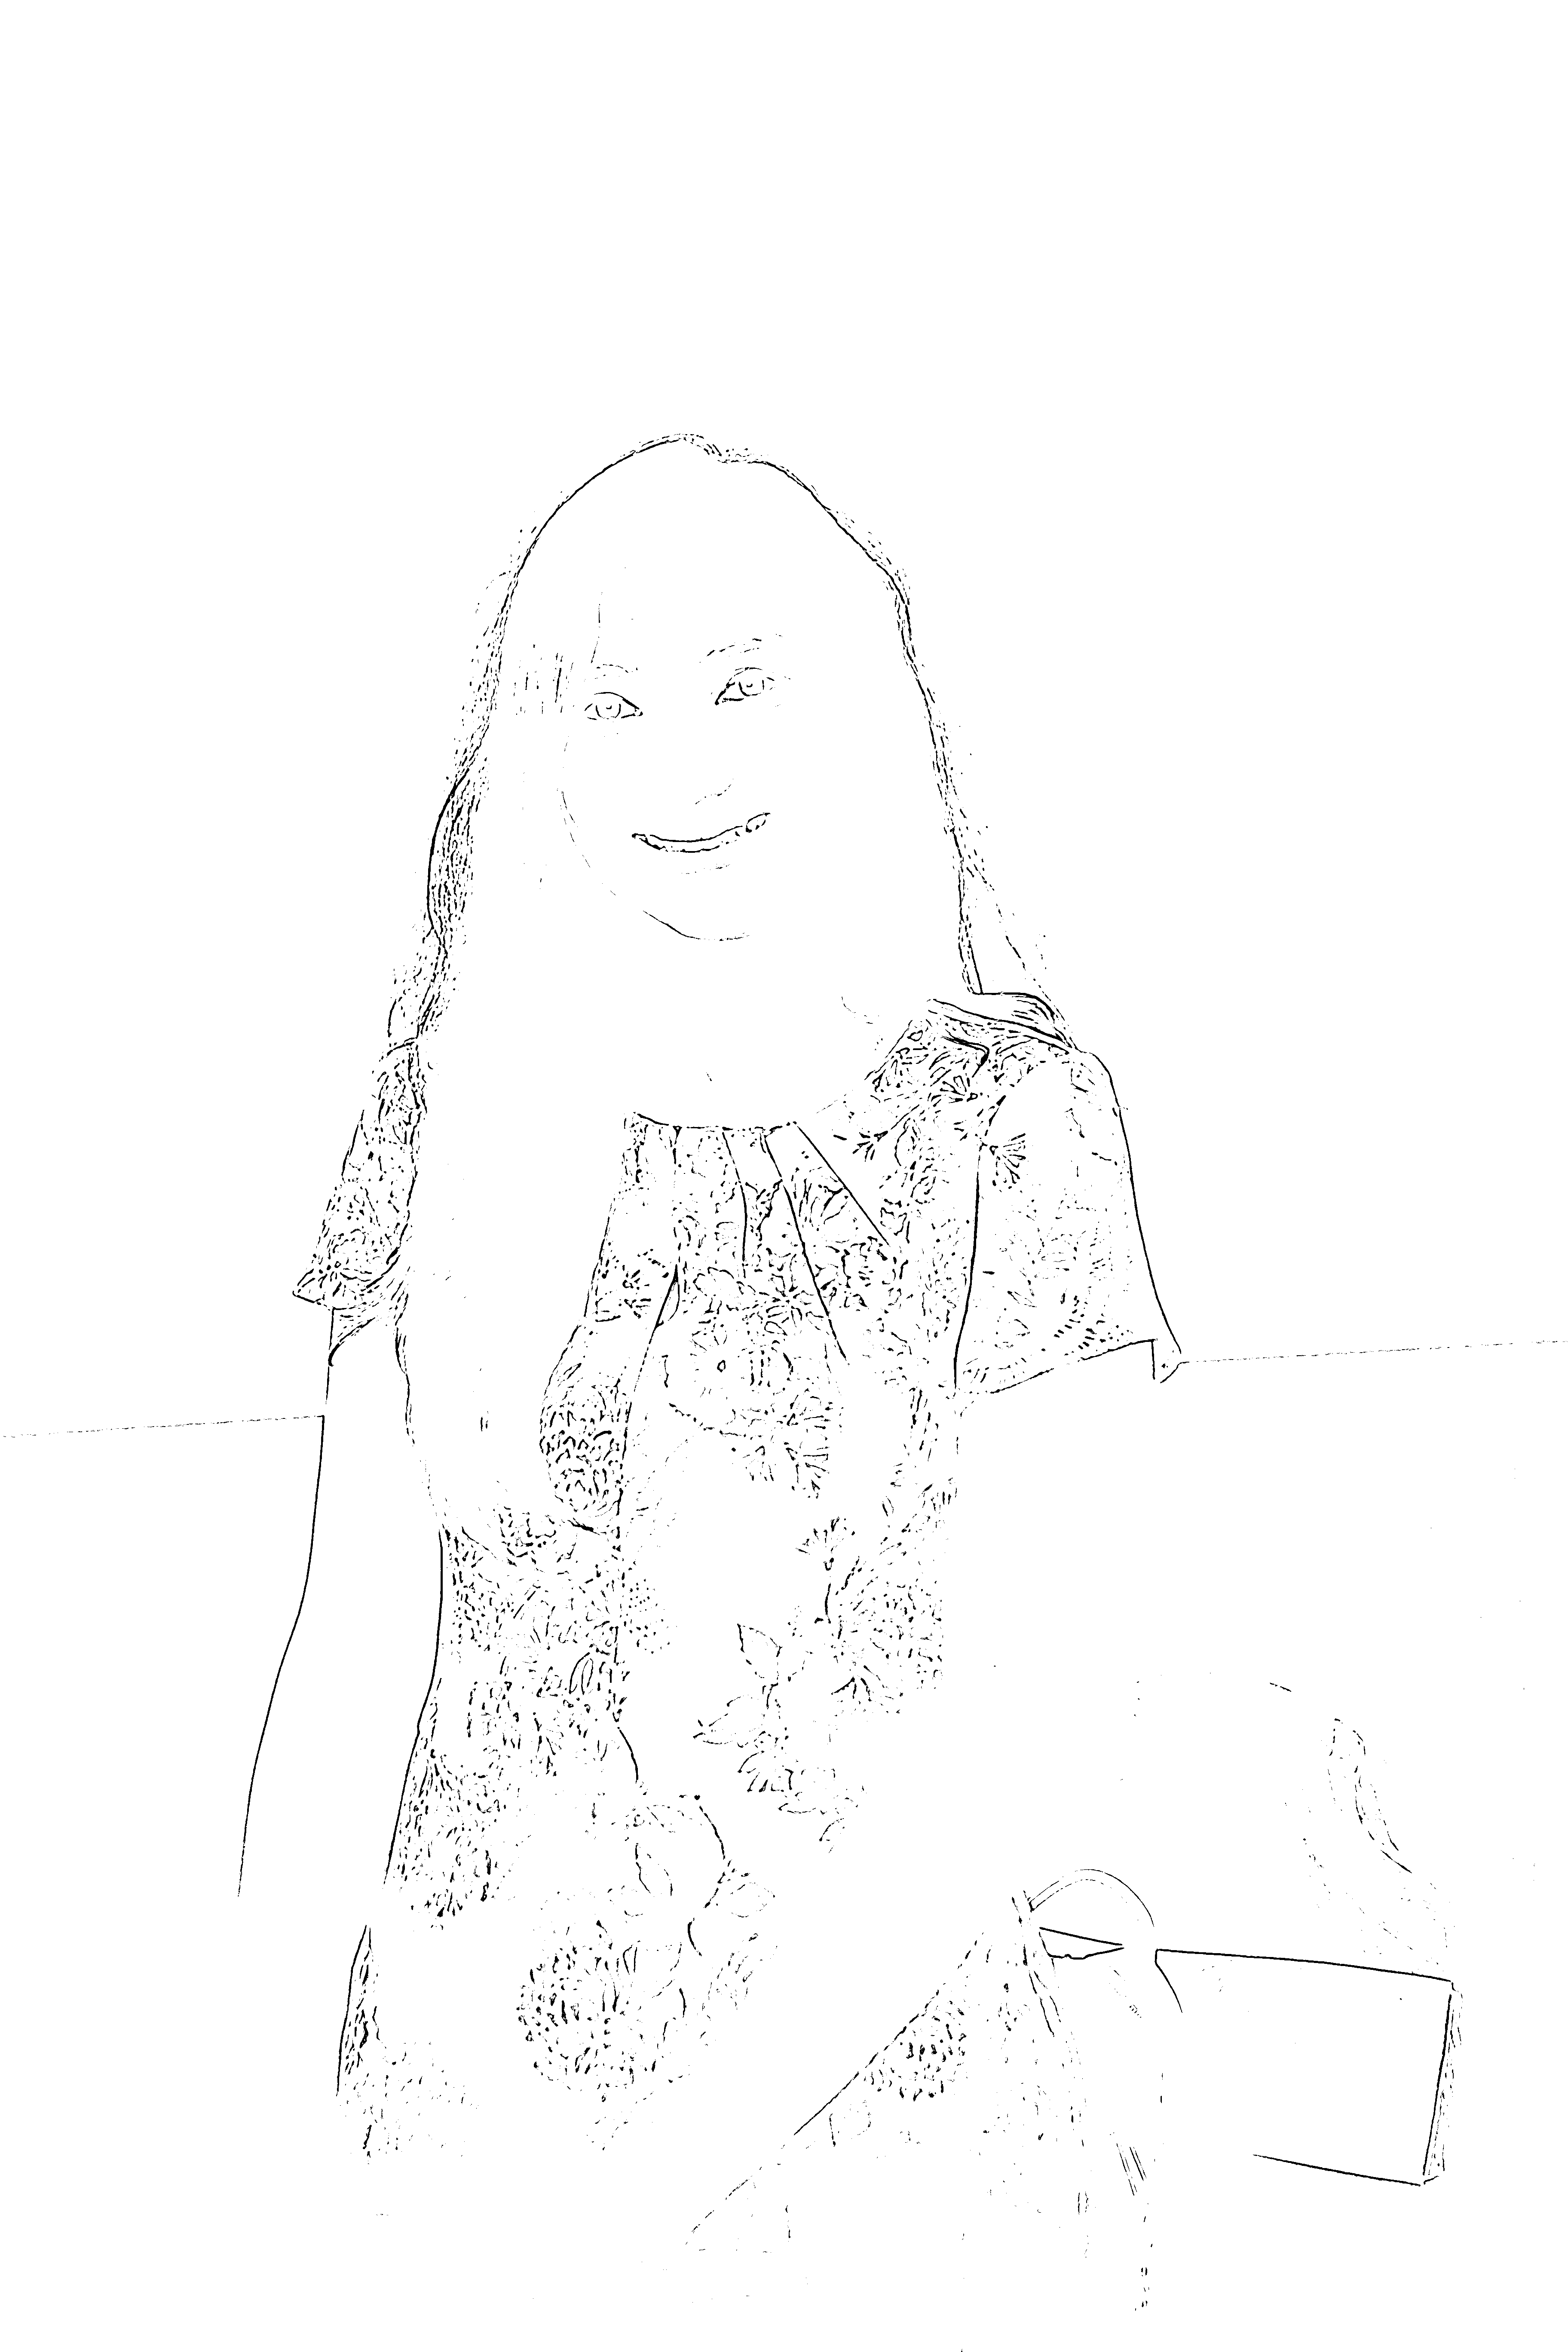

In [54]:
line_size = 11
blur_value = 7

edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

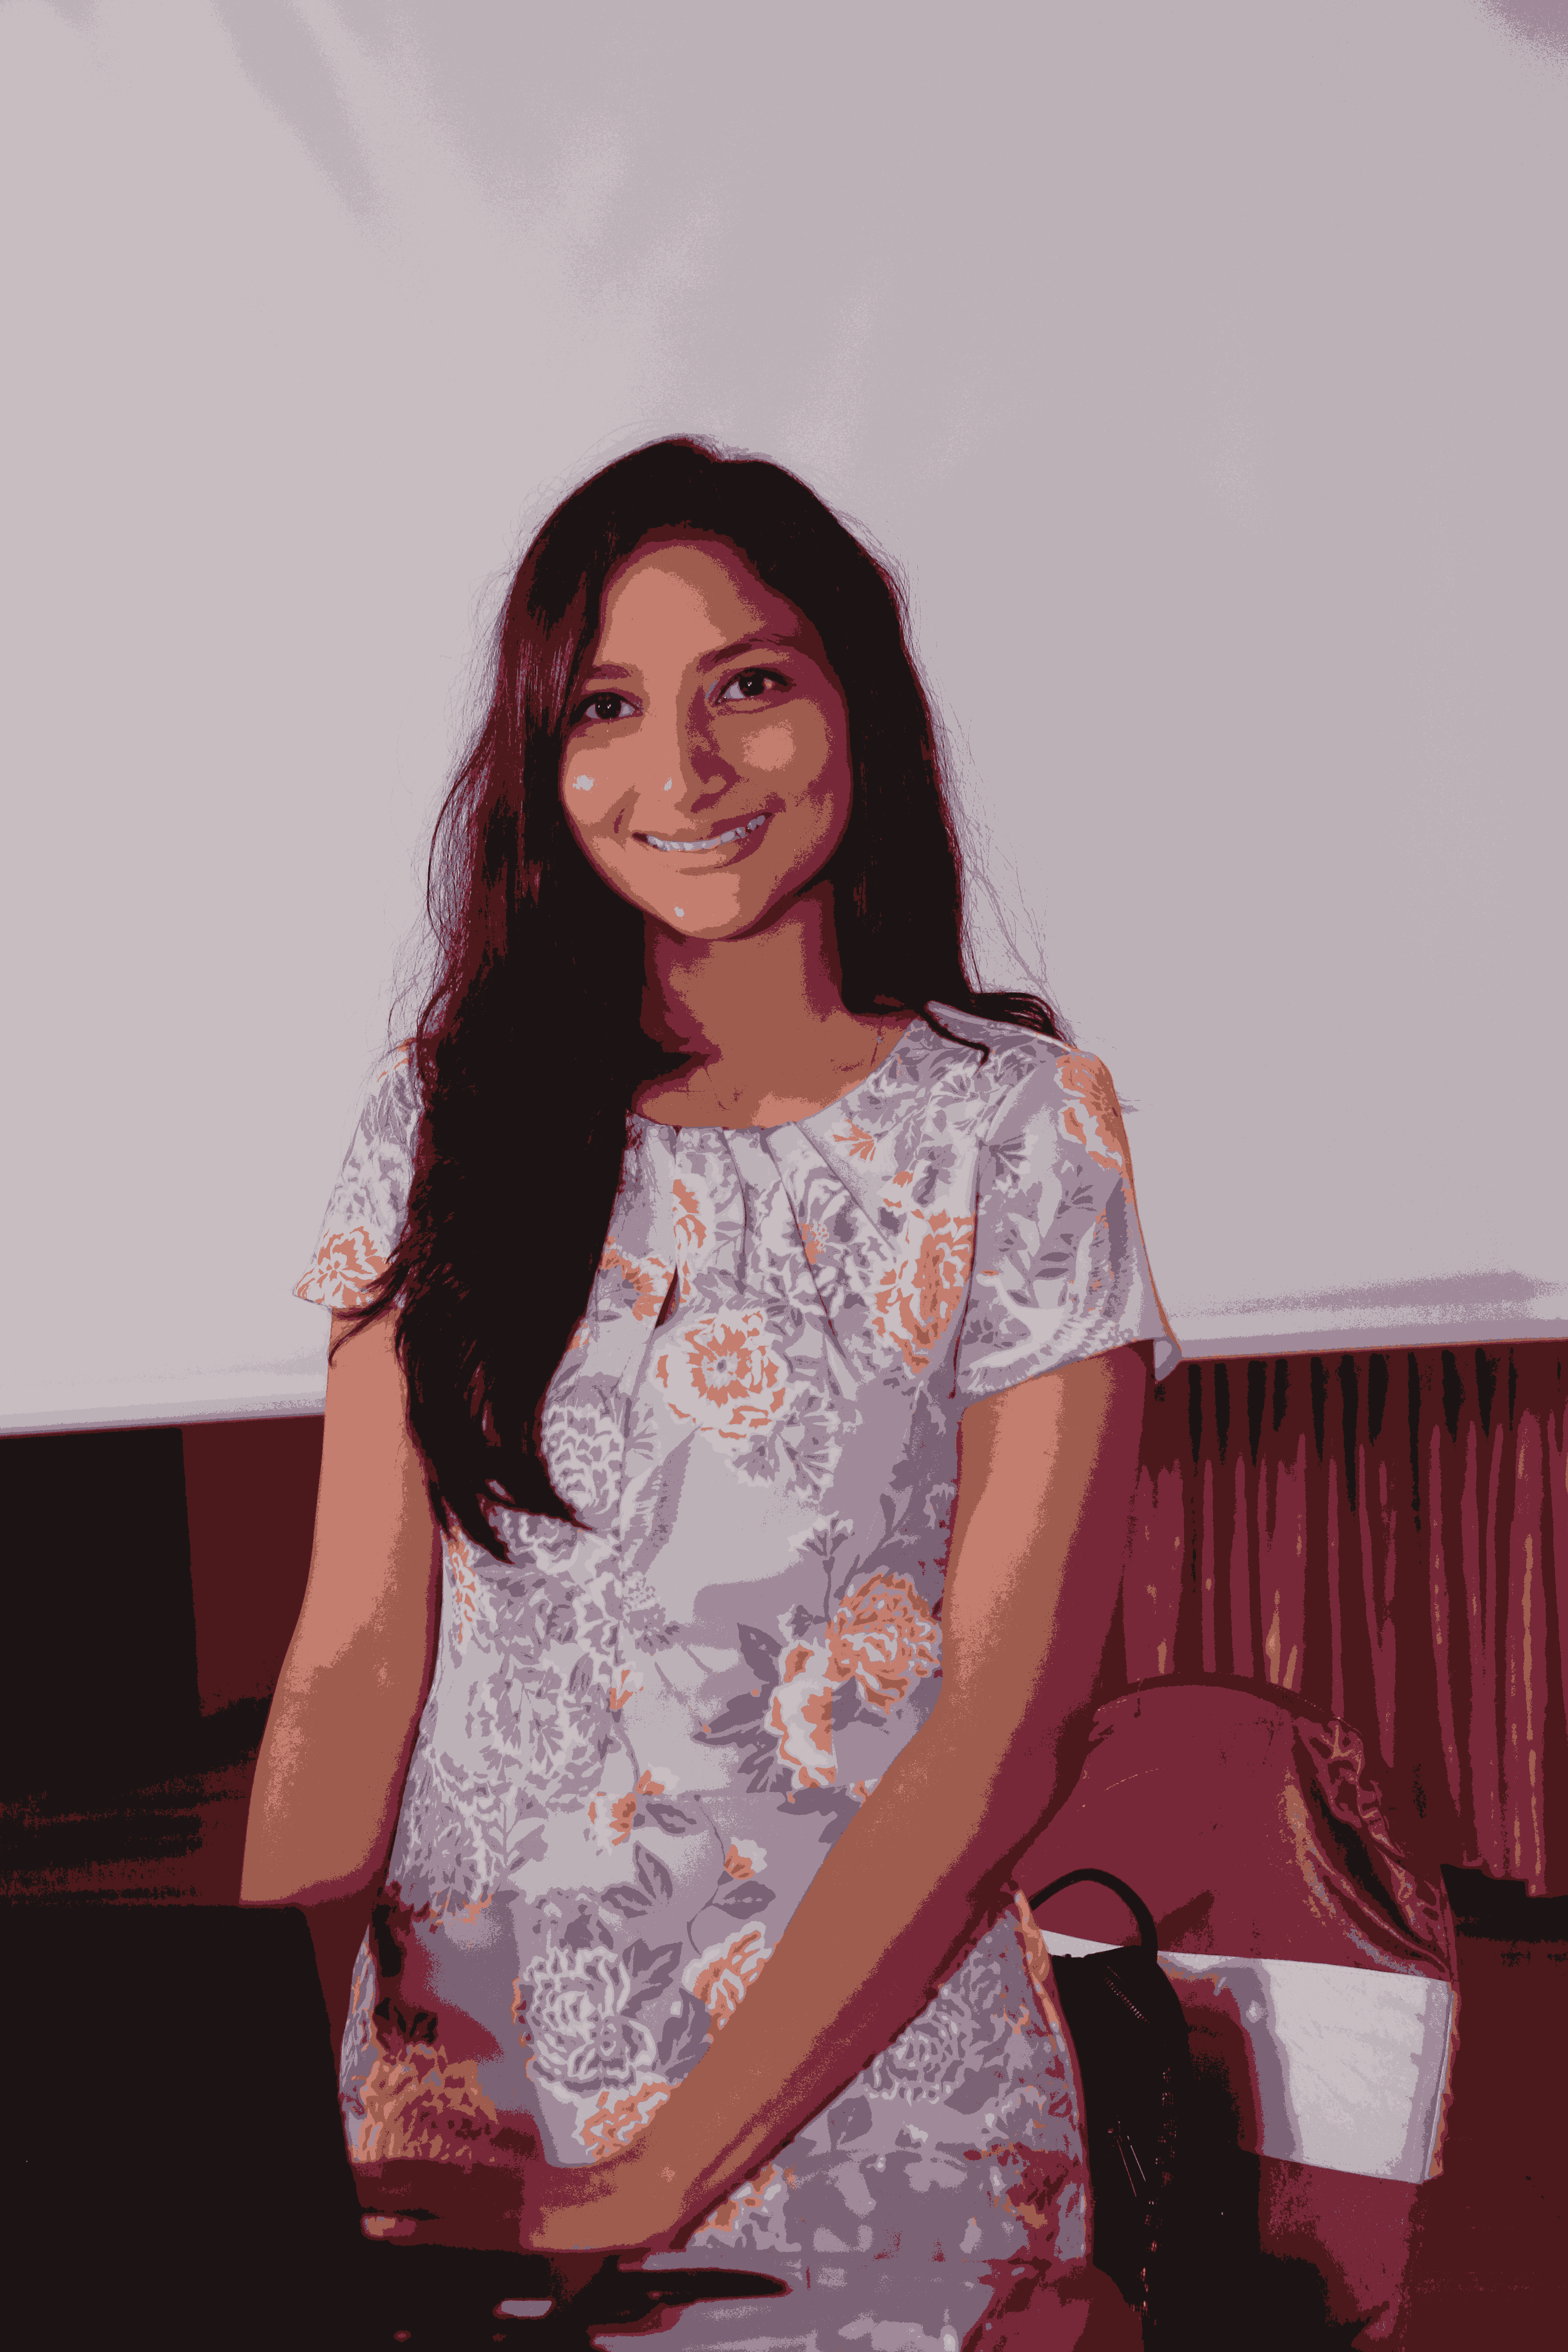

In [55]:
total_color = 9

img = color_quantization(img, total_color)
cv2_imshow(img)

In [56]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)
cv2_imshow(blurred)

Output hidden; open in https://colab.research.google.com to view.

In [57]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)

Output hidden; open in https://colab.research.google.com to view.

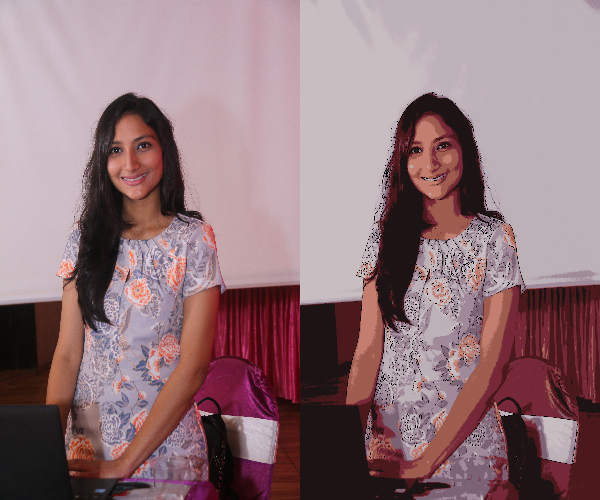

In [58]:
from google.colab.patches import cv2_imshow
img = cv2.imread(filename)
ReSized1 = cv2.resize(cartoon, (300, 500))

ReSized= cv2.resize(img, (300, 500))
# cv2_imshow(ReSized)
# cv2_imshow(ReSized1)
Hori = np.concatenate((ReSized, ReSized1), axis=1)
  
# concatanate image Vertically
# Verti = np.concatenate((ReSized, ReSized1), axis=0)
  
cv2_imshow(Hori)
# cv2.imshow('VERTICAL', Verti)
  
cv2.waitKey(0)
cv2.destroyAllWindows()
  